In [1]:
from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'
print(device)


cuda


In [3]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

file_path = "/content/drive/My Drive/question4-stock-data.csv"

# Load CSV into DataFrame
df = pd.read_csv(file_path)

# Show first few rows
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,Date,Adj Close,Close,High,Low,Open,Volume
0,0,1980-03-17,2.296798,3.291227,3.344743,3.291227,0.000000,41109.0
1,1,1980-03-18,2.306134,3.304606,3.358122,3.304606,0.000000,9343.0
2,2,1980-03-19,2.306134,3.304606,3.304606,3.304606,3.304606,0.0
3,3,1980-03-20,2.306134,3.304606,3.358122,3.304606,0.000000,10277.0
4,4,1980-03-21,2.362154,3.384880,3.438396,3.384880,0.000000,8409.0


In [17]:
df.shape

(11291, 8)

In [15]:
df[df.isnull().any(axis=1)]

,Unnamed: 0,Date,Adj Close,Close,High,Low,Open,Volume
10,10,1980-03-31,2.315470,3.317985,NaN,3.317985,0.000000,1869.0
20,20,1980-04-15,2.427510,3.478533,3.532049,NaN,0.000000,1869.0
37,37,1980-05-08,2.642250,3.786249,3.839765,3.786249,NaN,7474.0
40,40,1980-05-13,2.707607,3.879902,3.933418,3.879902,0.000000,NaN
51,51,1980-05-29,2.763627,3.960176,3.960176,NaN,3.960176,0.0
...,...,...,...,...,...,...,...,...
11223,11223,2024-09-23,185.399994,NaN,185.809998,184.130005,184.750000,357800.0
11238,11238,2024-10-14,175.100006,NaN,175.389999,174.080002,174.220001,316100.0
11243,11243,2024-10-21,NaN,169.169998,170.259995,168.660004,170.100006,420200.0
11256,11256,NaN,178.449997,178.449997,179.679993,177.259995,179.000000,638000.0


In [18]:
df = df.drop(columns=['Date'])

In [19]:
df = df.dropna()

In [20]:
close_prices = df['Close']
close_prices_reversed = close_prices[::-1]
close_prices_reversed.reset_index(drop=True, inplace=True)


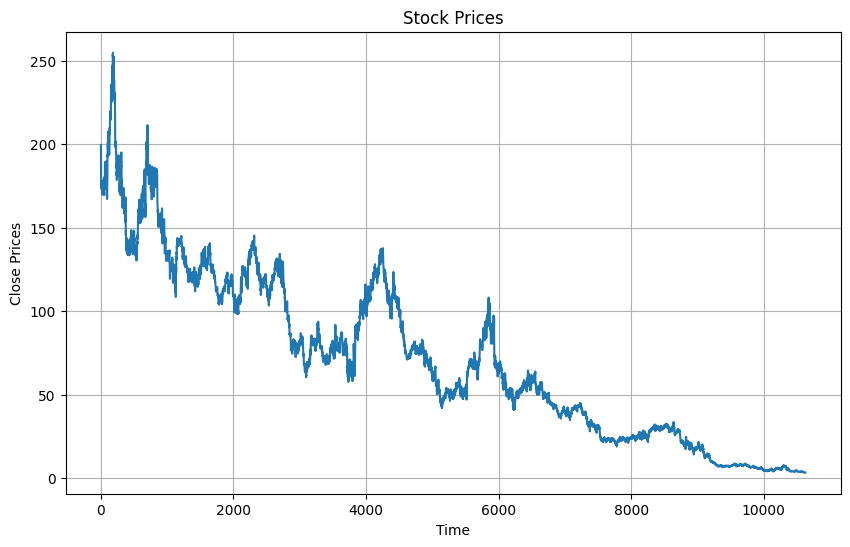

In [21]:

# Plot the line chart
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(close_prices_reversed)
plt.xlabel('Time')
plt.ylabel('Close Prices')
plt.title('Stock Prices')
plt.grid(True)
plt.show()

In [22]:
import numpy as np
data = close_prices_reversed.values.reshape(-1, 1)  # Reshape the data
data_normalized = data / np.max(data)  # Normalize the data

In [23]:
train_size = int(len(data_normalized) * 0.8)
train_data = data_normalized[:train_size]
test_data = data_normalized[train_size:]

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Function to create LSTM model
def create_lstm_model(units, activation, learning_rate):
    model = Sequential()
    model.add(LSTM(units=units, activation=activation, input_shape=(1, 1)))
    model.add(Dense(units=1))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

In [25]:
lstm_units = [50, 100, 200]
lstm_activations = ['relu', 'tanh']
learning_rates = [0.001, 0.01, 0.1]
epochs = 100
batch_size = 32

In [26]:
best_rmse = float('inf')
best_lstm_model = None

In [27]:
from sklearn.metrics import mean_squared_error

In [ ]:
for units in lstm_units:
    for activation in lstm_activations:
        for learning_rate in learning_rates:
            # Create and train LSTM model
            model = create_lstm_model(units=units, activation=activation, learning_rate=learning_rate)
            model.fit(train_data[:-1].reshape(-1, 1, 1), train_data[1:], epochs=epochs, batch_size=batch_size, verbose=0)

            # Predict on test data
            test_predictions = model.predict(test_data[:-1].reshape(-1, 1, 1)).flatten()

            # Calculate RMSE
            rmse = np.sqrt(mean_squared_error(test_data[1:], test_predictions))

            # Check if current model has lower RMSE
            if rmse < best_rmse:
                best_rmse = rmse
                best_lstm_model = model

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Predict on the entire dataset using the best LSTM model
all_lstm_predictions = best_lstm_model.predict(data_normalized[:-1].reshape(-1, 1, 1)).flatten()

# Inverse normalize the LSTM predictions
all_lstm_predictions = all_lstm_predictions * np.max(data)

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Support Vector Machines (SVM) Model
svm_model = SVR()

svm_params = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1]
}

svm_grid_search = GridSearchCV(svm_model, svm_params, scoring='neg_mean_squared_error')
svm_grid_search.fit(np.arange(len(close_prices_reversed)).reshape(-1, 1), close_prices_reversed)
svm_best_model = svm_grid_search.best_estimator_
svm_predictions = svm_best_model.predict(np.arange(len(close_prices_reversed)).reshape(-1, 1))

In [ ]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Random Forest Model
rf_model = RandomForestRegressor()

rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10]
}

rf_grid_search = GridSearchCV(rf_model, rf_params, scoring='neg_mean_squared_error')
rf_grid_search.fit(np.arange(len(close_prices_reversed)).reshape(-1, 1), close_prices_reversed)
rf_best_model = rf_grid_search.best_estimator_
rf_predictions = rf_best_model.predict(np.arange(len(close_prices_reversed)).reshape(-1, 1))

# Gradient Boosting Methods (XGBoost)
xgb_model = XGBRegressor()

xgb_params = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7]
}

xgb_grid_search = GridSearchCV(xgb_model, xgb_params, scoring='neg_mean_squared_error')
xgb_grid_search.fit(np.arange(len(close_prices_reversed)).reshape(-1, 1), close_prices_reversed)
xgb_best_model = xgb_grid_search.best_estimator_
xgb_predictions = xgb_best_model.predict(np.arange(len(close_prices_reversed)).reshape(-1, 1))

# Gradient Boosting Methods (LightGBM)
lgbm_model = LGBMRegressor()

lgbm_params = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7]
}

lgbm_grid_search = GridSearchCV(lgbm_model, lgbm_params, scoring='neg_mean_squared_error')
lgbm_grid_search.fit(np.arange(len(close_prices_reversed)).reshape(-1, 1), close_prices_reversed)
lgbm_best_model = lgbm_grid_search.best_estimator_
lgbm_predictions = lgbm_best_model.predict(np.arange(len(close_prices_reversed)).reshape(-1, 1))

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Function to calculate RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# List of model names and predictions
model_names = ['Support Vector Machines (SVM)', 'Random Forest', 'XGBoost', 'LightGBM']
predictions = [svm_predictions, rf_predictions, xgb_predictions, lgbm_predictions]
best_models = [svm_best_model, rf_best_model, xgb_best_model, lgbm_best_model]

# Truncate actual values to match the length of predictions
actual_values_reverse = close_prices_reversed[-len(svm_predictions):]

# Evaluate models and plot graphs
for i, model_name in enumerate(model_names):
    model_prediction = predictions[i]
    model_prediction_truncated = model_prediction[-len(actual_values_reverse):]  # Truncate predicted values
    model_rmse = rmse(actual_values_reverse, model_prediction_truncated)

    # Plotting actual and predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(actual_values_reverse, label='Actual')
    plt.plot(model_prediction_truncated, label='Predicted')
    plt.title(f"{model_name} - RMSE: {model_rmse:.2f}")
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

    # Print the best hyperparameters for the model
    best_model = best_models[i]
    print(f"Best Hyperparameters for {model_name}:")
    print(best_model)
    print("-----------------------------")

In [ ]:

# Plotting LSTM predictions
plt.figure(figsize=(10, 6))
plt.plot(actual_values_reverse, label='Actual')
plt.plot(all_lstm_predictions, label='LSTM Predicted')
plt.title(f"LSTM Model - RMSE: {best_rmse:.2f}")
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Load the stock data
file_path = "/content/drive/My Drive/question4-stock-data.csv"
data = pd.read_csv(file_path)
close_prices_reversed = data['Close']

# Reverse the order of the data
close_prices_reversed = close_prices_reversed.iloc[::-1]

# Reset index to maintain the correct time series order in the plot
close_prices_reversed.reset_index(drop=True, inplace=True)

# Data preprocessing
data = close_prices_reversed.values.reshape(-1, 1)  # Reshape the data
data_normalized = data / np.max(data)  # Normalize the data

# Split the data into training and testing sets
train_size = int(len(data_normalized) * 0.8)
train_data = data_normalized[:train_size]
test_data = data_normalized[train_size:]

# Function to create LSTM model
def create_lstm_model(units, activation, learning_rate):
    model = Sequential()
    model.add(LSTM(units=units, activation=activation, input_shape=(1, 1)))
    model.add(Dense(units=1))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Define hyperparameters for tuning
lstm_units = [50, 100, 200]
lstm_activations = ['relu', 'tanh']
learning_rates = [0.001, 0.01, 0.1]
epochs = 100
batch_size = 32

# Perform hyperparameter tuning for LSTM model
best_rmse = float('inf')
best_lstm_model = None

for units in lstm_units:
    for activation in lstm_activations:
        for learning_rate in learning_rates:
            # Create and train LSTM model
            model = create_lstm_model(units=units, activation=activation, learning_rate=learning_rate)
            model.fit(train_data[:-1].reshape(-1, 1, 1), train_data[1:], epochs=epochs, batch_size=batch_size, verbose=0)

            # Predict on test data
            test_predictions = model.predict(test_data[:-1].reshape(-1, 1, 1)).flatten()

            # Calculate RMSE
            rmse = np.sqrt(mean_squared_error(test_data[1:], test_predictions))

            # Check if current model has lower RMSE
            if rmse < best_rmse:
                best_rmse = rmse
                best_lstm_model = model

# Predict on the entire dataset using the best LSTM model
all_lstm_predictions = best_lstm_model.predict(data_normalized[:-1].reshape(-1, 1, 1)).flatten()

# Inverse normalize the LSTM predictions
all_lstm_predictions = all_lstm_predictions * np.max(data)

# Calculate the scaling factor based on the maximum value of the original data
scaling_factor = np.max(close_prices_reversed)

# Function to predict future stock prices using the LSTM model
def predict_future_lstm(model, data, num_predictions, scaling_factor):
    predictions = []

    # Get the last data point from the input data
    last_data_point = data[-1]

    for _ in range(num_predictions):
        # Predict the next time step
        prediction = model.predict(last_data_point.reshape(1, 1, 1))
        predictions.append(prediction[0, 0])

        # Update last_data_point to include the predicted value for the next iteration
        last_data_point = np.append(last_data_point[1:], prediction)

    # Inverse normalize the predictions
    predictions = np.array(predictions) * scaling_factor

    return predictions

# Predict the next 5 days using the LSTM model
num_predictions = 5
lstm_predictions = predict_future_lstm(best_lstm_model, data_normalized, num_predictions, scaling_factor)

# Plot the LSTM predictions for the next 10 days
plt.figure(figsize=(10, 6))
plt.plot(close_prices_reversed, label='Actual')
plt.plot(np.arange(len(close_prices_reversed), len(close_prices_reversed) + num_predictions), lstm_predictions, label='LSTM Predicted')
plt.title(f"LSTM Model - RMSE: {best_rmse:.2f}")
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Print the predicted stock prices for the next 10 days using LSTM
print("Predicted stock prices for the next 5 days:")
for i, prediction in enumerate(lstm_predictions, start=1):
    print(f"Day {i}: {prediction:.2f}")